In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importo i dati da drive
file = pd.read_excel(r'/content/drive/MyDrive/IOcompletion_tesi_agnese_daffara/Dataset/EXPLICIT_results.xlsx')

models = ["BERT-multi", "BERT-it", "UmBERTo", "BERTino", "ELECTRA"]
scores = (file['similarity1'][:600], file['similarity2'][:600], file['similarity3'][:600], file['similarity4'][:600], file['similarity5'][:600]) #importo i punteggi di similarity

In [ ]:
#calcolo il range di Oggetti per verbo nell'annotazione manuale

verbi = ['ascoltare', 'attendere', 'bere', 'cantare', 'chiamare', 'combattere', 'condurre', 'consumare', 'correre', 'cucinare', 'dirigere', 'disegnare', 'fumare', 'giocare', 'guadagnare', 'guidare', 'leggere', 'mangiare', 'ordinare', 'pagare', 'perdere', 'pregare', 'preoccupare', 'provare', 'respirare', 'scrivere', 'servire', 'suonare', 'tirare', 'vincere']

#creo una funzione che divide ogni lista in gruppi da 20 scores ciascuno, ogni gruppo si riferisce ad un verbo
def verb_values(score):
  gruppi = [score[i:i+20] for i in range(0, len(score), 20)]
  lista = list(zip(verbi, gruppi))
  return lista

#creo una variabile che contiene le due liste di Oggetti GS
ress = [predicted1]
#creo una lista che contiene tutti i risultati divisi in gruppi
results = []
results.append(verb_values(ress))
#creo un dizionario che contiene i verbi e i punteggi che hanno ottenuto in ogni lista
d={}
for verbo in verbi:
  d[verbo] = []
#itero su ogni lista di risultati
for l in results:
  for item in l:
    #appendo alla value del verbo tutti gli score dei modelli per quel verbo
    d[item].append(item)

#definisco una funzione per contare le parole uniche per ogni verbo
def conta_parole_uniche(d):
    risultati = {}
    for verbo, liste_parole in d.items():
        parole_uniche = set()
        for serie in liste_parole:
            parole_uniche.update(serie)
        numero_parole_uniche = len(parole_uniche)
        risultati[verbo] = numero_parole_uniche
    return risultati

#applico la funzione al dizionario
risultati = conta_parole_uniche(d)

#creo il dataframe ordinato
df = pd.DataFrame(list(risultati.items()), columns=['Verbo', 'Range'])
df_sorted = df.sort_values(by='Range', ascending=False)

#creo il grafico
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='Range', y='Verbo', data=df_sorted, palette='viridis')
plt.xlabel('')
plt.ylabel('')
plt.title("Range di Oggetti (IMPLICIT dataset: 2 annotatori)")
plt.xticks(range(0, int(df['Range'].max()) + 1, 1))
plt.show()

      modello  similarity
2     UmBERTo    0.668583
3     BERTino    0.655667
1     BERT-it    0.594517
4     ELECTRA    0.576417
0  BERT-multi    0.410550


<ipython-input-3-c63ead5c09f1>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x='modello', y='similarity', data=df, palette='viridis', linewidth=0.2, ci=None)
<ipython-input-3-c63ead5c09f1>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='modello', y='similarity', data=df, palette='viridis', linewidth=0.2, ci=None)


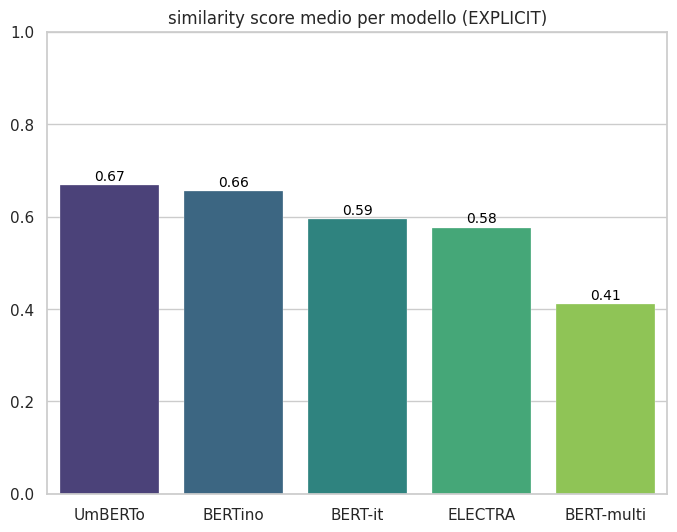

In [3]:
#visualizzo le medie totali di similarity per ogni modello

scores_mean = []
for sc in scores:
  scores_mean.append(np.mean(sc))

#creo il dataframe con i modelli e i rispettivi similarity scores totali
df = pd.DataFrame({'modello': models, 'similarity': scores_mean})
df = df.sort_values(by='similarity', ascending=False)
print(df)

#creo il grafico a barre con Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='modello', y='similarity', data=df, palette='viridis', linewidth=0.2, ci=None)
for index, value in enumerate(df['similarity']):
    barplot.text(index, value + 0.01, round(value, 2), ha='center', color='black', fontsize=10)
plt.xlabel('')
plt.ylabel('')
plt.title('similarity score medio per modello (EXPLICIT)')
plt.ylim(0, 1)
plt.show()

In [5]:
from scipy.stats import iqr
from scipy.stats import stats

#calcolo una statistica descrittiva completa per ogni modello

results = {} #creo il dizionario per il nome del modello e tutte le statistiche
for model, score in zip(models, scores): #faccio le misurazioni statistiche che mi interessano per ogni modello
    results[model] = {
        'Moda': stats.mode(score),
        'Mediana': np.median(score),
        'Media': np.mean(score),
        'Deviazione Standard': np.std(score),
        'Minimo': np.min(score),
        'Massimo': np.max(score),
        'Campo di Variazione': np.max(score) - np.min(score),
        'Scarto Interquartile': iqr(score),
        'Scarto Medio Assoluto': np.median(np.abs(score - np.median(score))),
        'Varianza': np.var(score),
        'Scarto Quadratico Medio': np.std(score),
        'Coefficiente di Variazione': (np.std(score) / np.mean(score)) * 100,
        'Deviazione Mediana Assoluta': np.median(np.abs(score - np.median(score))),
        'Q1': np.percentile(score, 25),
        'Q3': np.percentile(score, 75)
    }

#stampo i risultati
for key, value in results.items():
    print(f"\nResults for {key}:")
    for measure, result in value.items():
        print(f"{measure}: {result}")


Results for BERT-multi:
Moda: ModeResult(mode=1.0, count=70)
Mediana: 0.36
Media: 0.41054999999999997
Deviazione Standard: 0.2889755425060513
Minimo: -0.18
Massimo: 1.0
Campo di Variazione: 1.18
Scarto Interquartile: 0.3425
Scarto Medio Assoluto: 0.17000000000000004
Varianza: 0.08350686416666667
Scarto Quadratico Medio: 0.2889755425060513
Coefficiente di Variazione: 70.38741749020858
Deviazione Mediana Assoluta: 0.17000000000000004
Q1: 0.21
Q3: 0.5525

Results for BERT-it:
Moda: ModeResult(mode=1.0, count=186)
Mediana: 0.54
Media: 0.5945166666666667
Deviazione Standard: 0.32097471300538444
Minimo: -0.16
Massimo: 1.0
Campo di Variazione: 1.16
Scarto Interquartile: 0.65
Scarto Medio Assoluto: 0.27
Varianza: 0.1030247663888889
Scarto Quadratico Medio: 0.32097471300538444
Coefficiente di Variazione: 53.98918667915973
Deviazione Mediana Assoluta: 0.27
Q1: 0.35
Q3: 1.0

Results for UmBERTo:
Moda: ModeResult(mode=1.0, count=249)
Mediana: 0.69
Media: 0.6685833333333333
Deviazione Standard: 0.

<ipython-input-5-cbb2461bc5da>:9: DeprecationWarning: Please use `mode` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  'Moda': stats.mode(score),


Questo calcola precision, recall e fscore dei modelli

In [6]:
from sklearn.metrics import precision_recall_fscore_support

#questo calcola precision, recall e fscore dei modelli
#calcolo precision, recall e fscore dei modelli

outputs = [file['BERT-multi'][:600], file['BERT-italian-xxl'][:600], file['UmBERTo'][:600], file['BERTino'][:600], file['ELECTRA-italian'][:600]]
predicted = file['GS_Obj']

count = 0
for output in outputs:
  count = count + 1
  stat = precision_recall_fscore_support(output, predicted, average= "weighted")
  print('\nmodello', count)
  print('precision:', round(stat[0],2))
  print('recall:', round(stat[1],2))
  print('f-measure:', round(stat[2],2))


modello 1
precision: 0.17
recall: 0.12
f-measure: 0.12

modello 2
precision: 0.42
recall: 0.31
f-measure: 0.33

modello 3
precision: 0.52
recall: 0.42
f-measure: 0.44

modello 4
precision: 0.44
recall: 0.37
f-measure: 0.38

modello 5
precision: 0.38
recall: 0.3
f-measure: 0.31


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Qui calcoliamo quali verbi sono stati più facili da riempire

          Verbo  Punteggi
0     ascoltare      0.80
1     attendere      0.52
2          bere      0.60
3       cantare      0.45
4      chiamare      0.65
5    combattere      0.80
6      condurre      0.57
7     consumare      0.60
8       correre      0.41
9      cucinare      0.57
10     dirigere      0.66
11    disegnare      0.50
12       fumare      0.49
13      giocare      0.63
14   guadagnare      0.77
15      guidare      0.51
16      leggere      0.52
17     mangiare      0.61
18     ordinare      0.50
19       pagare      0.62
20      perdere      0.51
21      pregare      0.47
22  preoccupare      0.53
23      provare      0.55
24    respirare      0.57
25     scrivere      0.56
26      servire      0.58
27      suonare      0.50
28       tirare      0.72
29      vincere      0.66


<ipython-input-7-9c931ebc2c28>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x='Punteggi', y='Verbo', data=media_per_verbo, palette='viridis', order=media_per_verbo['Verbo'])


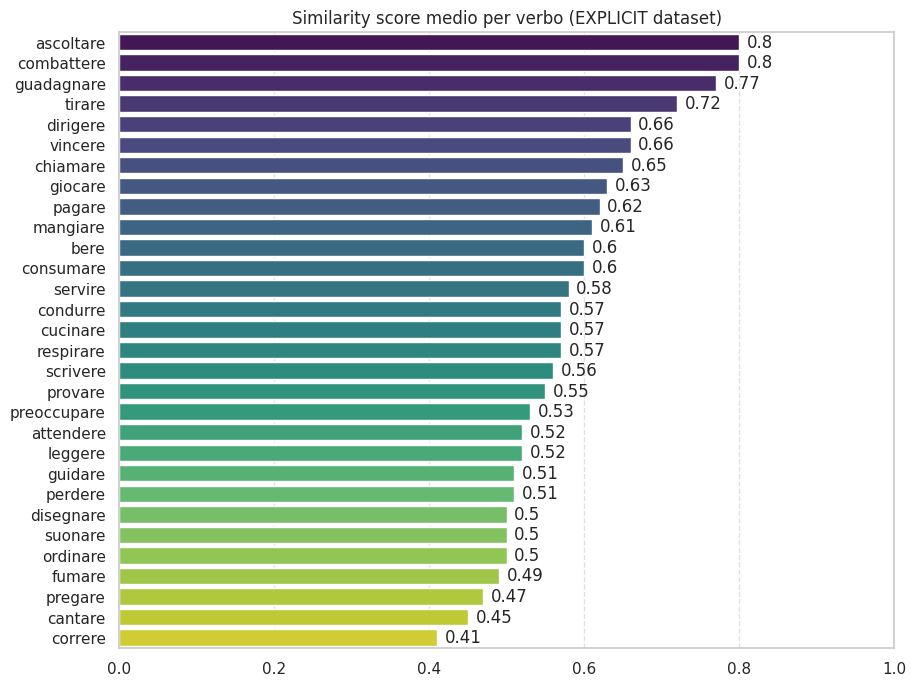

In [7]:
#qui creiamo un plot che ci dice su che verbi i modelli hanno performato meglio

verbi = ['ascoltare', 'attendere', 'bere', 'cantare', 'chiamare', 'combattere', 'condurre', 'consumare', 'correre', 'cucinare', 'dirigere', 'disegnare', 'fumare', 'giocare', 'guadagnare', 'guidare', 'leggere', 'mangiare', 'ordinare', 'pagare', 'perdere', 'pregare', 'preoccupare', 'provare', 'respirare', 'scrivere', 'servire', 'suonare', 'tirare', 'vincere']
score = file['media_tot'][:600]

def verb_values(score): #creo una funzione che divide ogni lista in gruppi da 20 scores ciascuno, ogni gruppo si riferisce ad un verbo
  gruppi = [score[i:i+20] for i in range(0, len(score), 20)]
  lista = list(zip(verbi, gruppi))
  return lista

sis = verb_values(score)

df = pd.DataFrame(sis, columns=['Verbo', 'Punteggi'])
df = df.explode('Punteggi')
df['Punteggi'] = df['Punteggi'].astype(float)
media_per_verbo = df.groupby('Verbo')['Punteggi'].mean().reset_index()
media_per_verbo['Punteggi'] = media_per_verbo['Punteggi'].round(2)
print(media_per_verbo)
media_per_verbo = media_per_verbo.sort_values(by='Punteggi', ascending=False)

plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
plot = sns.barplot(x='Punteggi', y='Verbo', data=media_per_verbo, palette='viridis', order=media_per_verbo['Verbo'])
for i, score in enumerate(media_per_verbo['Punteggi']):
    rounded_score = round(score, 2)
    plot.text(score + 0.01, i, f'{rounded_score}', va='center')
plt.title('Similarity score medio per verbo (EXPLICIT dataset)')
plt.xlabel('')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xlim(0, 1)
plt.show()